<a href="https://www.kaggle.com/code/akshaypatil7015/used-car-price-prediction?scriptVersionId=153135736" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


# Used cars price prediction 

## 1. Business understanding

The dataset is about the Used Cars, main goal is to predict the price based on the features of cars available in dataset.

## 2. Data loading and Understanding

In [2]:
# Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
# Data loading and printing the head 

dfs = pd.read_csv('/kaggle/input/used-cars-price-prediction/train-data.csv')
dfs.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# Checking for number Rows and Columns

dfs.shape

(6019, 14)

## 3. Data Cleaning

In [5]:
# Checking for Missing Values

dfs.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
# Remove unwanted columns

dfs.drop(['Unnamed: 0', 'Location', 'New_Price','Power'], axis=1, inplace=True)

In [7]:
# Droping missing values

dfs = dfs.dropna()

In [8]:
dfs.shape

(5975, 10)

In [9]:
dfs.isna().sum()

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Seats                0
Price                0
dtype: int64

In [10]:
dfs.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.0,17.74


In [11]:
# checking information of dataset
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   object 
 7   Engine             5975 non-null   object 
 8   Seats              5975 non-null   float64
 9   Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 513.5+ KB


In [12]:
# Created the new columns based on brand and model of cars
new = dfs['Name'].str.split(' ', n = 2, expand = True)
dfs['brand']= new[0]
dfs['model']= new[1]
dfs.drop('Name', axis=1, inplace = True)
dfs.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,brand,model
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,5.0,1.75,Maruti,Wagon
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.0,12.50,Hyundai,Creta
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,4.50,Honda,Jazz
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,6.00,Maruti,Ertiga
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.0,17.74,Audi,A4


In [13]:
# Removing string and converting the column to numeric
dfs['Mileage'] = dfs['Mileage'].str.replace('km/kg', '')
dfs['Mileage'] = dfs['Mileage'].str.replace('kmpl', '').astype('float64')
dfs['Engine'] = dfs['Engine'].str.replace('CC', '').astype('int64')
dfs.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,brand,model
0,2010,72000,CNG,Manual,First,26.60,998,5.0,1.75,Maruti,Wagon
1,2015,41000,Diesel,Manual,First,19.67,1582,5.0,12.50,Hyundai,Creta
2,2011,46000,Petrol,Manual,First,18.20,1199,5.0,4.50,Honda,Jazz
3,2012,87000,Diesel,Manual,First,20.77,1248,7.0,6.00,Maruti,Ertiga
4,2013,40670,Diesel,Automatic,Second,15.20,1968,5.0,17.74,Audi,A4


In [14]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5975 non-null   int64  
 1   Kilometers_Driven  5975 non-null   int64  
 2   Fuel_Type          5975 non-null   object 
 3   Transmission       5975 non-null   object 
 4   Owner_Type         5975 non-null   object 
 5   Mileage            5975 non-null   float64
 6   Engine             5975 non-null   int64  
 7   Seats              5975 non-null   float64
 8   Price              5975 non-null   float64
 9   brand              5975 non-null   object 
 10  model              5975 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 560.2+ KB


## 4. EDA and Visualization

In [15]:
# Statistics of Numerical data
dfs.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,5.278828,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000


In [16]:
#correlation of Numeric variables 

dfs.select_dtypes(include='number').corr()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
Year,1.000000,-0.172663,0.314417,-0.052538,0.012338,0.305800
Kilometers_Driven,-0.172663,1.000000,-0.064991,0.090832,0.083101,-0.011263
Mileage,0.314417,-0.064991,1.000000,-0.598638,-0.308226,-0.313877
Engine,-0.052538,0.090832,-0.598638,1.000000,0.393435,0.659117
Seats,0.012338,0.083101,-0.308226,0.393435,1.000000,0.052262
Price,0.305800,-0.011263,-0.313877,0.659117,0.052262,1.000000


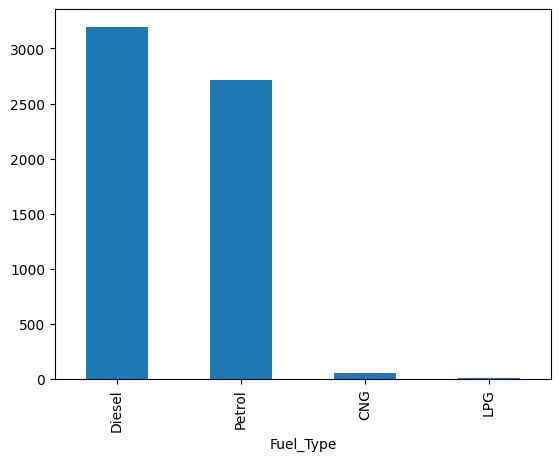

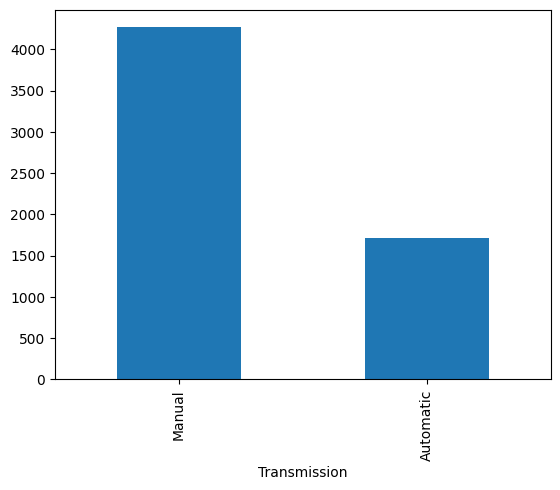

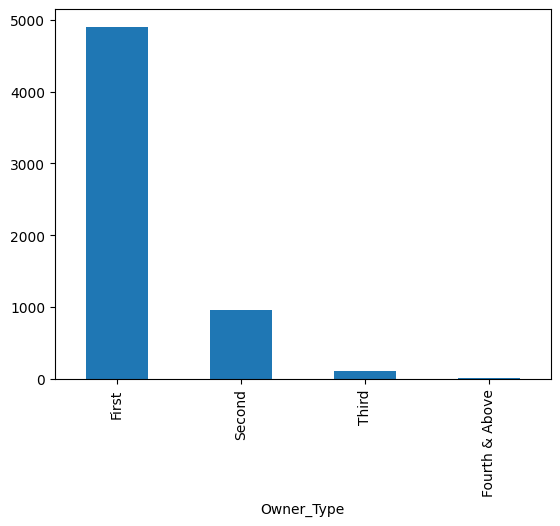

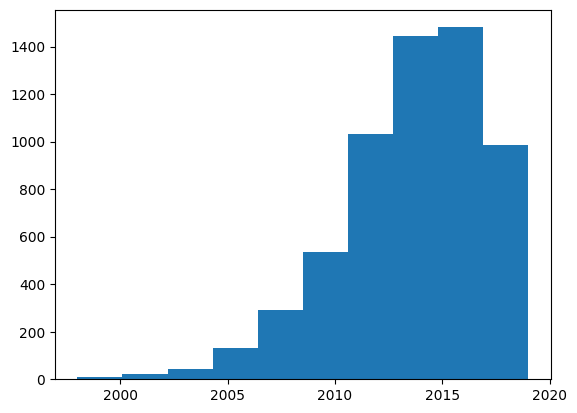

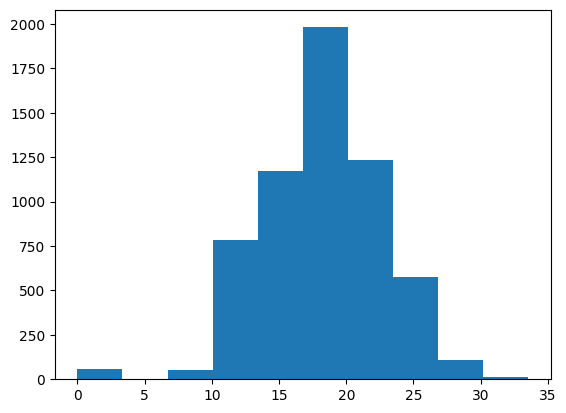

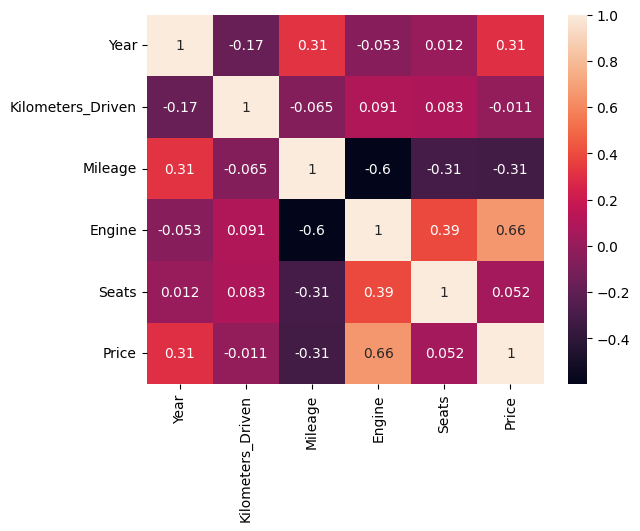

In [17]:
# Bar plot for type of fuel
dfs['Fuel_Type'].value_counts().plot(kind='bar')
plt.show()

# Bar plot for type of Transmission
dfs['Transmission'].value_counts().plot(kind='bar')
plt.show()

# Bar plot for type of Owner_Type
dfs['Owner_Type'].value_counts().plot(kind='bar')
plt.show()

# Histogram for Year
plt.hist(dfs['Year'])
plt.show()

# Histogram for Mileage
plt.hist(dfs['Mileage'])
plt.show()

# Heatmap on numeric data
sns.heatmap(dfs.corr(numeric_only=True), annot=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


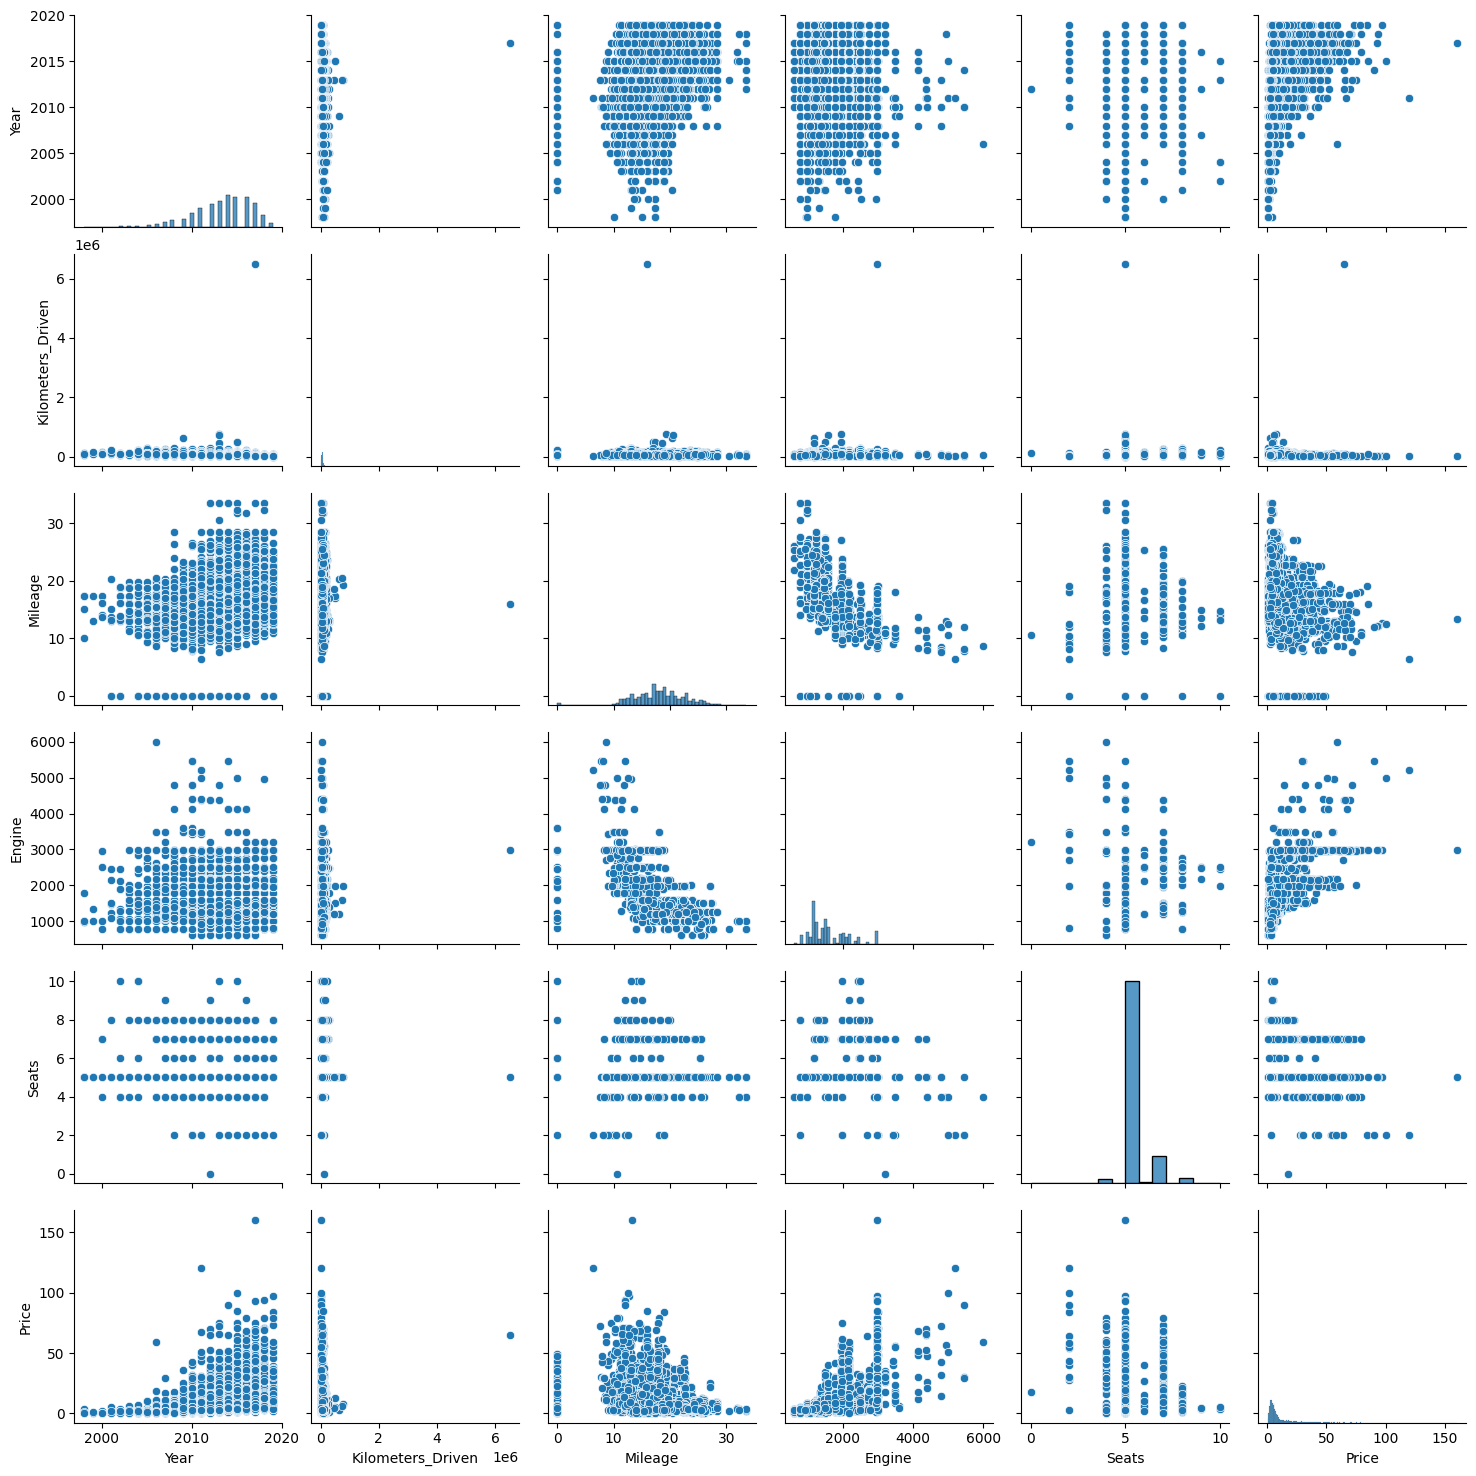

In [18]:
# pairplot
sns.pairplot(data=dfs)
plt.show()

In [19]:
# LabelEncoder
le=LabelEncoder()
dfs['Fuel_Type']=le.fit_transform(dfs['Fuel_Type'])
dfs['Transmission']=le.fit_transform(dfs['Transmission'])
dfs['Owner_Type']=le.fit_transform(dfs['Owner_Type'])
dfs['brand']=le.fit_transform(dfs['brand'])
dfs['model']=le.fit_transform(dfs['model'])
dfs.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,brand,model
0,2010,72000,0,1,0,26.60,998,5.0,1.75,18,186
1,2015,41000,1,1,0,19.67,1582,5.0,12.50,10,53
2,2011,46000,3,1,0,18.20,1199,5.0,4.50,9,97
3,2012,87000,1,1,0,20.77,1248,7.0,6.00,18,68
4,2013,40670,1,0,2,15.20,1968,5.0,17.74,1,10


## 5.Model building

## Data split

In [20]:
# Create Dependent and Independent variables
X = dfs.drop(['Price'], axis=1)
y = dfs['Price']

# Split Data into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# checking for shapes 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4780, 10)
(1195, 10)
(4780,)
(1195,)


## A. Linear Regression

In [21]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)

In [22]:
# calculate mean squared error and r2 score
lr_mse = mean_squared_error(lr_y_pred, y_test)
lr_r2 = r2_score(lr_y_pred, y_test)
print(f"Mean Squared Error: {lr_mse}")
print(f"R2 Score: {lr_r2}")

Mean Squared Error: 54.2821709870533
R2 Score: 0.3050203600557104


## B. Random Forest

In [23]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_y_pred = rfr.predict(X_test)

In [24]:
# calculate mean squared error and r2 score
rfr_mse = mean_squared_error(rfr_y_pred, y_test)
rfr_r2 = r2_score(rfr_y_pred, y_test)
print(f"Mean Squared Error: {rfr_mse}")
print(f"R2 Score: {rfr_r2}")

Mean Squared Error: 22.917484346248852
R2 Score: 0.781360687186776


## Cross validation 

In [25]:
# Linear Regression Cross validation
lr_cv_score = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Linear Regression cross validation score: {lr_cv_score}")

Linear Regression cross validation score: [0.65823821 0.63049103 0.41458657 0.65181774 0.64622857]


In [26]:
# Random Forest Regression cross validation
rfr_cv_score = cross_val_score(rfr, X_train, y_train, cv=5)
print(f"Random Forest Regression cross validation: {rfr_cv_score}")

Random Forest Regression cross validation: [0.83837989 0.82753692 0.90822799 0.90371088 0.8829212 ]


## Model Seleection

In [27]:
# Model selection
if lr_cv_score.mean() > rfr_cv_score.mean():
    mld_select = lr
    print("Linear Regression Model is selected.")
else:
    mld_select = rfr
    print("Random Forest Regression is selected.")
    

Random Forest Regression is selected.


In [28]:
# fit selected model

selected_model = mld_select.fit(X_train, y_train)
print(selected_model)

RandomForestRegressor()


In [29]:
final_pred = selected_model.predict(X_test)
final_pred

array([13.4297 ,  2.5247 ,  2.69995, ..., 43.0592 ,  3.0657 ,  4.0257 ])

In [30]:
fnl_rfr_mse = mean_squared_error(final_pred, y_test)
fnl_rfr_r2 = r2_score(final_pred, y_test)
print(f"Mean Squared Error: {fnl_rfr_mse}")
print(f"R2 Score: {fnl_rfr_r2}")

Mean Squared Error: 23.317439284663944
R2 Score: 0.7741732410439774


## Conclusion
**r2 score for final model and build model is approximately same for training and test data**